In [1]:
import blur
import matplotlib.pyplot as plt
    

In [2]:
ba = blur.blurCube()


ba.blur_cubes()

#ba.plot_edge_fwhm()

#print(ba.sigma_values)


path: hico_data/downloaded_data/H2009349090039.L1B_ISS.nc
path: hico_data/downloaded_data/H2009339143952.L1B_ISS.nc
path: hico_data/downloaded_data/H2009336071540.L1B_ISS.nc
path: hico_data/downloaded_data/H2009322052444.L1B_ISS.nc
path: hico_data/downloaded_data/H2009321214730.L1B_ISS.nc
path: hico_data/downloaded_data/H2009317202215.L1B_ISS.nc
path: hico_data/downloaded_data/H2009294141216.L1B_ISS.nc
path: hico_data/downloaded_data/H2009294063909.L1B_ISS.nc
path: hico_data/downloaded_data/H2009293152420.L1B_ISS.nc
path: hico_data/downloaded_data/H2010353143500.L1B_ISS.nc
path: hico_data/downloaded_data/H2010348080207.L1B_ISS.nc
path: hico_data/downloaded_data/H2010346033159.L1B_ISS.nc
path: hico_data/downloaded_data/H2010339004143.L1B_ISS.nc
path: hico_data/downloaded_data/H2010339155831.L1B_ISS.nc
path: hico_data/downloaded_data/H2010338153839.L1B_ISS.nc
path: hico_data/downloaded_data/H2010338015025.L1B_ISS.nc
path: hico_data/downloaded_data/H2010317173241.L1B_ISS.nc
path: hico_dat

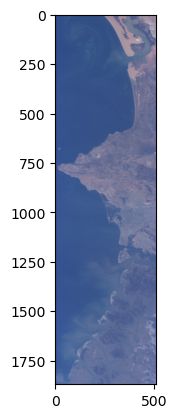

In [3]:
ba.visualize_cube()

In [4]:
import os
for path in ba.paths_to_nc:
    for i in range(1, 34):
        print(os.path.basename(path) + "_" + str(i).zfill(2))

AttributeError: 'blurCube' object has no attribute 'paths_to_nc'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


final fusion min:  0.15044437
final fusion max:  1.6048925
sharpest image min:  0.14719999
sharpest image max:  1.6031998


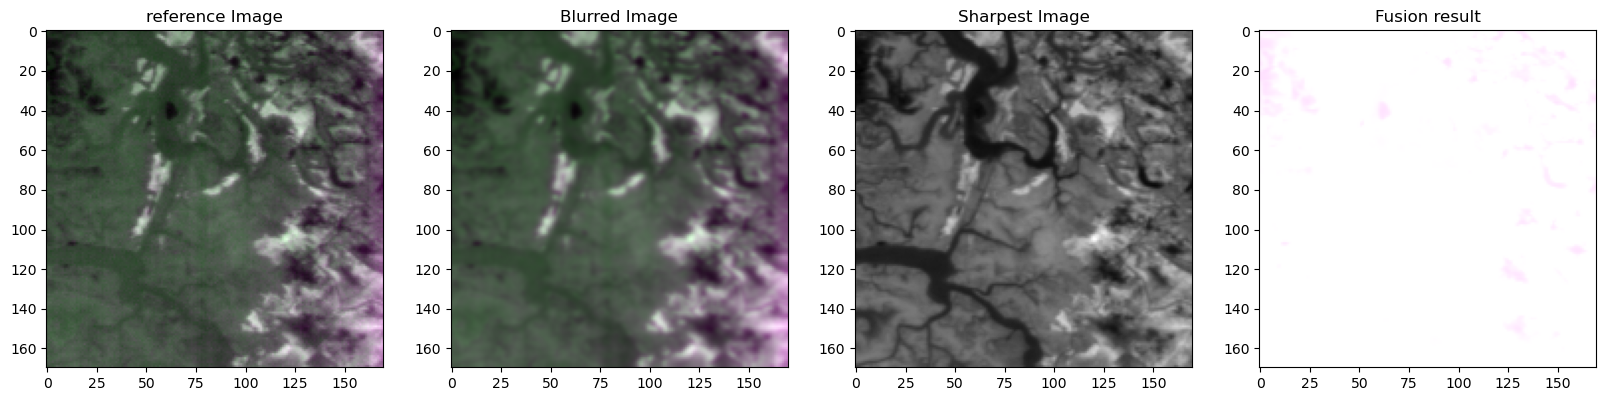

In [6]:
fusion_result_path = '/home/kimado/master/DIP-HyperKite/Experiments/HyperPNN/hico_dataset/N_modules(1)/final_prediction.mat'
blurred_cube_path = '/home/kimado/master/DIP-HyperKite/datasets/hico/edge_image.nc/edge_image.nc_33/edge_image.nc_33.mat'

import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt


def visualize_cube():
    """
    fusion_result = sio.loadmat(fusion_result_path)
    image = fusion_result['H2010086172605.L1B_ISS.nc_01_pred'].transpose()
    print(fusion_result.keys())
    """
    blurred_image = sio.loadmat(blurred_cube_path)['blurred'].transpose(2, 0, 1)
    image = sio.loadmat(blurred_cube_path)['ref'].transpose(2, 0, 1)
    sharpest_image = sio.loadmat(blurred_cube_path)['sharpest_image']
    final_fusion = sio.loadmat('/home/kimado/master/DIP-HyperKite/Experiments/HyperKite/hico_dataset/N_modules/final_prediction.mat')['edge_image.nc_33_pred'].transpose(2, 0, 1)
    print("final fusion min: ", np.min(final_fusion))
    print("final fusion max: ", np.max(final_fusion))
    print("sharpest image min: ", np.min(image))
    print("sharpest image max: ", np.max(image))
    #max_value = np.max(blurred_image)
    #print(f"The maximum value in the blurred_image is {max_value}")
    
    R_f = image[42-9, :, :]
    G_f = image[27-9, :, :]
    B_f = image[11-9, :, :]
    
    R = blurred_image[42-9, :, :]
    G = blurred_image[27-9, :, :]
    B = blurred_image[11-9, :, :]

    Fus_r = final_fusion[42-9, :, :]
    Fus_g = final_fusion[27-9, :, :]
    Fus_b = final_fusion[11-9, :, :]
    
    R_f = (R_f - R_f.min()) / (R_f.max() - R_f.min())
    G_f = (G_f - G_f.min()) / (G_f.max() - G_f.min())
    B_f = (B_f - B_f.min()) / (B_f.max() - B_f.min())
    
    R = (R - R.min()) / (R.max() - R.min())
    G = (G - G.min()) / (G.max() - G.min())
    B = (B - B.min()) / (B.max() - B.min())

    Fus_r = (Fus_r - Fus_r.min()) / (Fus_r.max() - Fus_r.min())
    Fus_g = (Fus_g - Fus_g.min()) / (Fus_g.max() - Fus_g.min())
    Fus_b = (Fus_b - Fus_b.min()) / (Fus_b.max() - Fus_b.min())


    fus_image = np.dstack((Fus_r, Fus_g, Fus_b))
    reference_image = np.dstack((R_f, G_f, B_f))
    blurred_image_stack = np.dstack((R, G, B))

    # Create a figure with 2 subplots
    plt.figure(figsize=(20, 5))

    # Display the rgb_image in the first subplot
    plt.subplot(1, 4, 1)
    plt.imshow(reference_image)
    plt.title('reference Image')

    plt.subplot(1, 4, 2)
    plt.imshow(blurred_image_stack)
    plt.title('Blurred Image')

    plt.subplot(1, 4, 3)
    plt.imshow(sharpest_image, cmap='gray')
    plt.title('Sharpest Image')

    plt.subplot(1, 4, 4)
    plt.imshow(fus_image)
    plt.title('Fusion result')

    plt.show()

visualize_cube()

(87, 1870, 510)


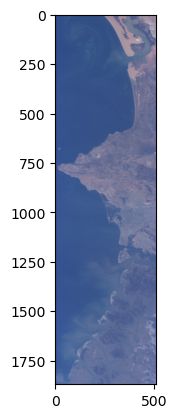

In [108]:
path = '/home/kimado/master/HYPSO-1/hico_data/downloaded_data/edge_image.nc'
import xarray as xr
%matplotlib inline

def read_cube():
    #f = nc.Dataset(self.path_to_nc, 'r')
    #ds = xr.open_dataset(self.path_to_nc, group='products', engine='h5netcdf', phony_dims='access')
    ds = xr.open_dataset(path, group='products', engine='h5netcdf')
    Lt = ds['Lt']

    slope = 0.02  # The slope value mentioned in the documentation
    Lt_corrected = Lt * slope
    
    cube = Lt_corrected[:1870, :510, 9:96].values.transpose(2, 0, 1) # to make the patches work

    return cube

def visualize_cube():
    import matplotlib.pyplot as plt
    import numpy as np
    cube =read_cube()
    print(cube.shape)

    R = cube[42-9, :, :]
    G = cube[27-9, :, :]
    B = cube[11-9, :, :]

    R = (R - R.min()) / (R.max() - R.min())
    G = (G - G.min()) / (G.max() - G.min())
    B = (B - B.min()) / (B.max() - B.min())
    # Stack the R, G, B bands to create a 3D array (image)
    rgb_image = np.dstack((R, G, B))

    plt.imshow(rgb_image)
    plt.show()

visualize_cube()

In [121]:
import cv2
import os

cube = read_cube()
patch_size = 170
path = '/home/kimado/master/HYPSO-1/hico_data/downloaded_data/edge_image.nc'
filefolder = "/home/kimado/master/DIP-HyperKite/datasets/hico"

def blur_cube():

    final_sigma =  [1.2071679687499999, 1.1487695312499997, 1.11373046875, 1.06701171875, 1.0436523437499998, 1.0086132812499997, 0.9735742187499998, 0.95021484375, 0.9268554687499999, 0.88013671875, 0.86845703125, 0.8450976562499999, 0.82173828125, 0.7866992187499999, 0.73998046875, 0.73998046875, 0.73998046875, 0.6932617187499999, 0.65822265625, 0.6348632812499999, 0.6231835937499999, 0.6115039062500001, 0.59982421875, 0.57646484375, 0.5647851562499999, 0.5531054687499999, 0.5414257812500001, 0.52974609375, 0.51806640625, 0.50638671875, 0.49470703124999993, 0.48302734375, 0.47134765624999997, 0.47134765624999997, 0.47134765624999997, 0.45966796874999993, 0.43630859375, 0.42462890624999994, 0.42462890624999994, 0.42462890624999994, 0.41294921875, 0.41294921875, 0.42462890624999994, 0.41294921875, 0.42462890624999994, 0.42462890624999994, 0.43630859375, 0.42462890624999994, 0.42462890624999994, 0.42462890624999994, 0.42462890624999994, 0.42462890624999994, 0.44798828125, 0.45966796874999993, 0.47134765624999997, 0.47134765624999997, 0.47134765624999997, 0.48302734375, 0.49470703124999993, 0.51806640625, 0.51806640625, 0.5414257812500001, 0.5531054687499999, 0.5647851562499999, 0.58814453125, 0.6115039062500001, 0.64654296875, 0.65822265625, 0.68158203125, 0.7049414062499999, 0.72830078125, 0.7633398437499999, 0.7750195312499999, 0.81005859375, 0.8334179687499998, 0.8567773437499999, 0.89181640625, 0.9151757812499999, 0.95021484375, 0.9852539062499999, 1.0086132812499997, 1.0436523437499998, 1.06701171875, 1.10205078125, 1.1370898437499997, 1.1721289062499998, 1.2071679687499999]

    blurred_cube = np.zeros_like(cube)

    for i in range(cube.shape[2]):
        blurred_cube[:,:,i] = cv2.GaussianBlur(cube[:,:,i], (0,0), sigmaX=final_sigma[i])

    divide_into_patches(blurred_cube)

def read_cube():
    #f = nc.Dataset(self.path_to_nc, 'r')
    #ds = xr.open_dataset(self.path_to_nc, group='products', engine='h5netcdf', phony_dims='access')

    ds = xr.open_dataset(path, group='products', engine='h5netcdf')
    Lt = ds['Lt']

    slope = 0.02  # The slope value mentioned in the documentation
    Lt_corrected = Lt * slope
    
    cube = Lt_corrected[:1870, :510, 9:96].values # to make the patches work

    return cube

def divide_into_patches(blurred_cube):
    """
        Divide the blurred cube into patches of size patch_size.
    """
    from scipy.io import savemat

    ref = cube

    sharpest_image = blurred_cube[:,:,44]

    count = 1
    for i in range(0, blurred_cube.shape[0], patch_size):
        for j in range(0, blurred_cube.shape[1], patch_size):

            blurred_patch = blurred_cube[i:i+patch_size, j:j+patch_size, :]
            ref_patch = ref[i:i+patch_size, j:j+patch_size, :]
            sharpest_image_patch = sharpest_image[i:i+patch_size, j:j+patch_size]
            
            # Create a folder for each patch
            base_name = os.path.basename(path)
            folder_name = f'{base_name}_{str(count).zfill(2)}'
            file_folder = os.path.join(filefolder, base_name)
            file_name = os.path.join(file_folder, folder_name)
            if not os.path.exists(file_name):
                os.makedirs(file_name)
            
            savemat(os.path.join(file_name, f'{folder_name}.mat'), {'ref': ref_patch, 'blurred': blurred_patch, 'sharpest_image': sharpest_image_patch})                
            count += 1

blur_cube()
